Directions: 

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, identify which factors predict future user adoption.


In [357]:
#import modules

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [358]:
#Import csvs as pandas data frame

users=pd.read_csv('/Users/anna/Downloads/relax_challenge/takehome_users.csv',encoding = "ISO-8859-1")
users_eng=pd.read_csv('/Users/anna/Downloads/relax_challenge/takehome_user_engagement.csv',encoding = "ISO-8859-1")

In [359]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [360]:
users_eng.head()


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [361]:
users_eng['time_stamp']=pd.to_datetime(users_eng['time_stamp'])


## Feature Engineering

First, we will identify which users are "adopted users". The prompt of this challenge defines an adopted user as someone who "has logged into the product on three separate days in at least one seven-day period"

In [362]:
users_eng=users_eng.reset_index()
users_eng=users_eng.set_index('time_stamp')

In [363]:
adopted_user=[]
for user_id in users_eng.user_id.unique():
    df=users_eng[users_eng.user_id==user_id]
    for x in df.rolling(window='7D').sum().visited:
        if x>=3:
            adopted_user.append(user_id)

In [364]:
(len(set(adopted_user))/len(set(users_eng.user_id)))*100

18.157089425365523

Out of all the users in our data, only 18.16% can be considered as adopted users. Next, we will add this feature (whether or not the user is an adopted user) to our main DataFrame. Since the main goal of this project is to identify the factors that predict user adoption, this new feature will be our target variable.

In [365]:
adopted_user=pd.DataFrame(set(active_user),columns=['user_id'])
adopted_user['adopted']=1
adopted_user

,user_id,adopted
0,8192,1
1,2,1
2,8196,1
3,8201,1
4,10,1
...,...,...
1597,8159,1
1598,8161,1
1599,8166,1
1600,8169,1


In [366]:
users=users.merge(adopted_user,left_on='object_id',right_on='user_id',how='left').drop('user_id',axis=1).fillna(0)
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0.0,0.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0.0,0.0


## Exploratory Data Analysis

Next, through EDA, we try to see the difference in behavior of adopted users and those who are not. This will give us an idea whether a feature's effect is significant in determining our target varianle.

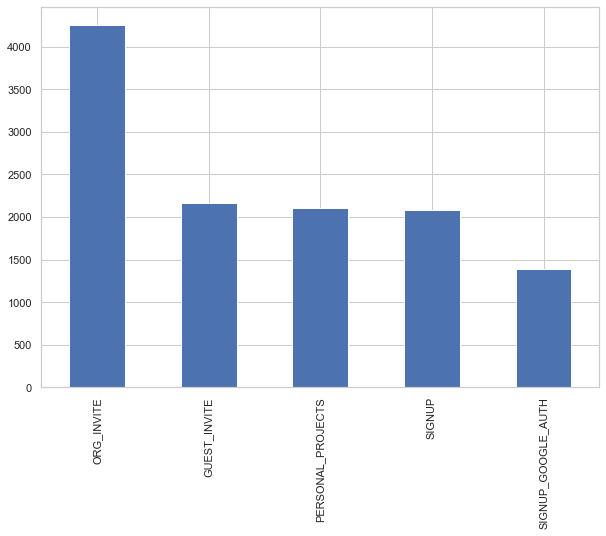

In [367]:
f, ax = plt.subplots(figsize=(10,7))
ax=sns.set(style="whitegrid")
plt.xticks(rotation=30)
users_sorted=users.creation_source.value_counts().sort_values()
ax=users['creation_source'].value_counts().plot(kind='bar')


We see that most of the users were invited by an organization as a full member. Next, we compare the creation source of the adopted users and those that are not. As we can see in the countplot below, the proportions of the creation sources of these two groups are roughly similar.

Text(0.5, 1.0, 'Creation Source (Adopted Users Vs. Non Adopted Users)')

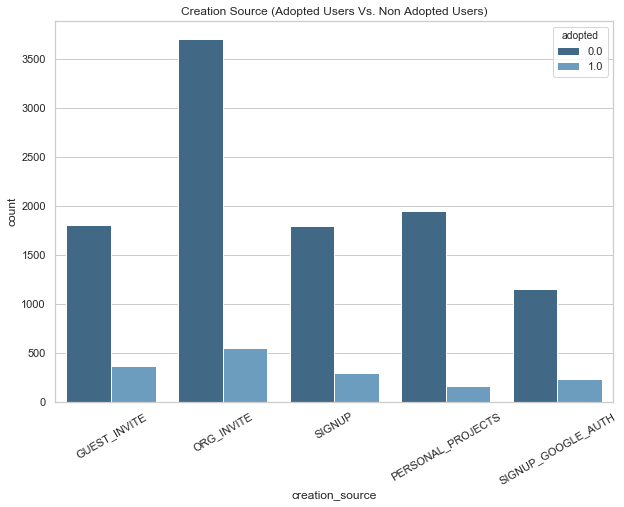

In [368]:
f, ax = plt.subplots(figsize=(10,7))
ax=sns.set(style="whitegrid")
plt.xticks(rotation=30)
ax=sns.countplot(x="creation_source", data=users,hue='adopted',palette=("Blues_d"))
plt.title('Creation Source (Adopted Users Vs. Non Adopted Users)')

Next, we do the same thing with what we did with creation source--we check if there's a difference in the proportion of those opted in to the mailing list and those who are on the regular marketing emails for those who are considered as adopted users.

Text(0.5, 1.0, 'Opted In To Mailing List (Adopted Users Vs. Non Adopted Users)')

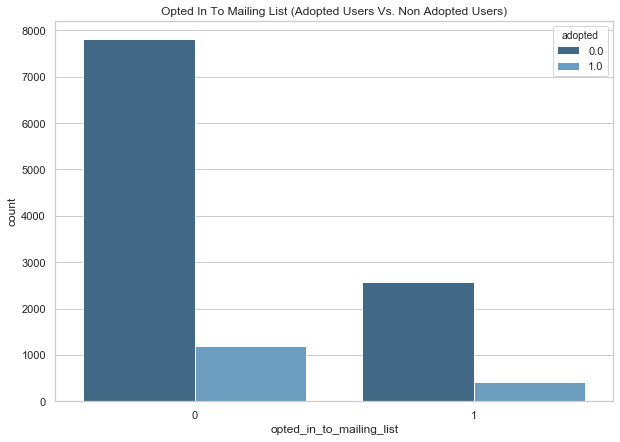

In [369]:
f, ax = plt.subplots(figsize=(10,7))
ax=sns.set(style="whitegrid")
ax=sns.countplot(x="opted_in_to_mailing_list", data=users,hue='adopted',palette=("Blues_d"))
plt.title('Opted In To Mailing List (Adopted Users Vs. Non Adopted Users)')

Text(0.5, 1.0, 'Creation Source (Adopted Users Vs. Non Adopted Users)')

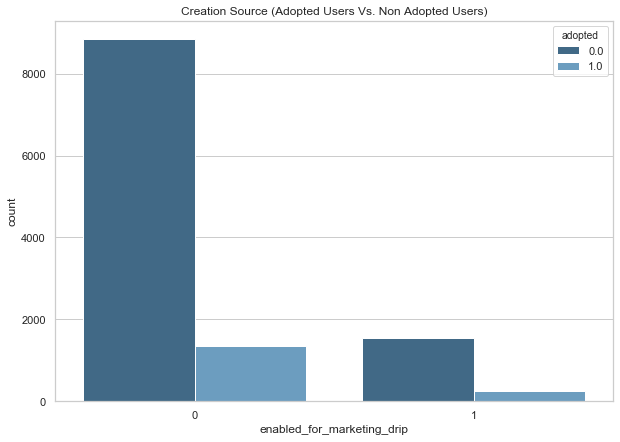

In [370]:
f, ax = plt.subplots(figsize=(10,7))
ax=sns.set(style="whitegrid")
ax=sns.countplot(x="enabled_for_marketing_drip", data=users,hue='adopted',palette=("Blues_d"))
plt.title('Creation Source (Adopted Users Vs. Non Adopted Users)')

For both features, most of the adopted users did not opt in for either marketing/mailing list.

Now, we do more feature engineering. The column 'invited_by_user_id' tells us which user invited them to join. We aren't necessarily interested in who invited them but instead, just if they were invited by another user or not. So, we create a new binary column 'invited' that tells us whether or not they were invited by another user.

In [371]:
invited=users[users.invited_by_user_id!=0][['name','invited_by_user_id']]
invited['invited']=1
invited=invited[['name','invited']]
users=users.merge(invited,on='name',how='left').fillna(0)

In [372]:
users[:2]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,1.0


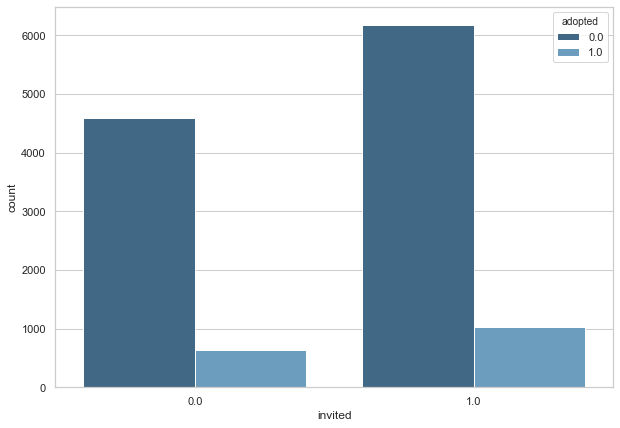

In [373]:
f, ax = plt.subplots(figsize=(10,7))
ax=sns.set(style="whitegrid")
ax=sns.countplot(x="invited", data=users,hue='adopted',palette=("Blues_d"))

As we can see, most of our adopted users were invited by a user.

To prevent added noise when we train our estimators, we drop columns that don't seem necessary such as each user's personal information (i.e. name, email and etc.)

In [374]:
users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'adopted',
       'invited'],
      dtype='object')

In [421]:
users_final=users[['creation_source', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'adopted',
       'invited']]

## Machine Learning

Now, we try to predict future user adoption using different machine learning models.

Since this is a classification problem, we can train the following models and see which performs best: 
`1) Logistic Regression `
`2) Random Forest Classifier `
`3) Gradient Boosting`
    

In [422]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#create dummies for categorical variables

users_final['creation_source']=users_final['creation_source'].astype('category')
users_final=pd.get_dummies(users_final,drop_first=True)


/Users/anna/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [423]:
#split into training and test data

X=users_final.drop(columns=['adopted'])
y=users_final.adopted

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

In [424]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg=LogisticRegression(random_state=42)
param_grid={'max_iter':[50,100,150]}
log_cv=GridSearchCV(log_reg,param_grid,cv=5)
log_cv.fit(X_train,y_train)
print('Best Parameters:\n',log_cv.best_params_)

/Users/anna/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anna/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anna/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anna/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anna/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

Best Parameters:
 {'max_iter': 50}


/Users/anna/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [426]:
log_cv.best_score_

0.8691105492990118

In [427]:
model_results={}
model_results['Logistic Regression']=log_cv.best_score_

### Random Forest Classifier

In [449]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
param_grid={'n_estimators':[50,75,100], 'max_depth':[5,10,15]}
rf_cv=GridSearchCV(rf,param_grid,cv=5)
rf_cv.fit(X_train, np.ravel(y_train))
print('Best Parameters:\n',rf_cv.best_params_)

Best Parameters:
 {'max_depth': 5, 'n_estimators': 75}


In [444]:
model_results['Random Forest Classifier']=rf_cv.best_score_
rf_cv.best_score_

0.8691105492990118

### Gradient Boosting

In [430]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier(random_state=42)
param_grid={'n_estimators':[50,100,150], 'max_depth':[5,10,15]}
gbr_cv=GridSearchCV(gbr,param_grid,cv=5)
gbr_cv.fit(X_train, np.ravel(y_train))

print('Best Parameters:\n',gbr_cv.best_params_)

Best Parameters:
 {'max_depth': 5, 'n_estimators': 50}


In [431]:
model_results['Gradient Boosting']=gbr_cv.best_score_
gbr_cv.best_score_

0.868995633187773

Text(0, 0.5, 'CV Scores')

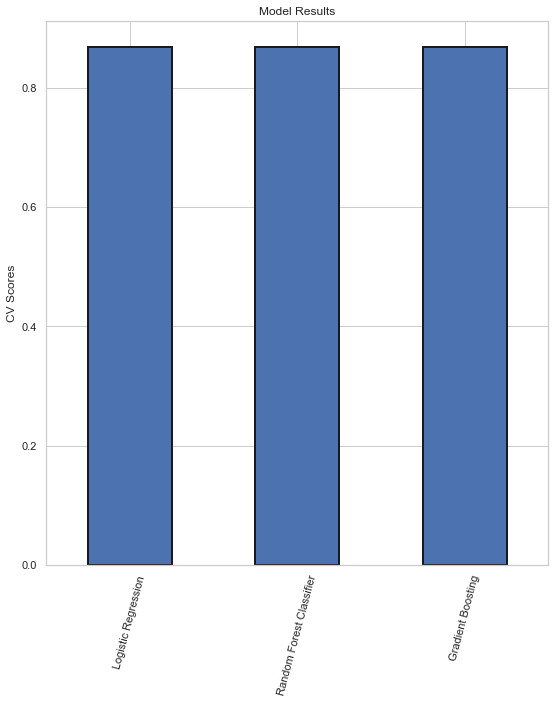

In [415]:
results=pd.DataFrame.from_dict(model_results,orient='index',columns=['cv_score'])
results=results.sort_values('cv_score',ascending=False)
results['cv_score'].plot.bar(figsize = (9, 10), edgecolor = 'k', linewidth = 2)
plt.xticks(rotation=75)
plt.title('Model Results')
plt.ylabel('CV Scores')

As we can see, the three estimators performed roughly the same. Although, RF and Logistic Regression performed a bit better than GBR. To see which features were the best predictors for user adoption, we can use RF's feature_importance_ feature. 

In [432]:
features=X_train.columns

# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': rf.fit(X_train, np.ravel(y_train)).feature_importances_})
feature_importances.sort_values(by='importance',ascending=False)

/Users/anna/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,feature,importance
4,creation_source_PERSONAL_PROJECTS,0.306389
2,invited,0.172945
3,creation_source_ORG_INVITE,0.145239
0,opted_in_to_mailing_list,0.140165
1,enabled_for_marketing_drip,0.116585
6,creation_source_SIGNUP_GOOGLE_AUTH,0.065190
5,creation_source_SIGNUP,0.053486


It looks like those who were invited to join another user's personal workspace (`creation_source`='PERSONAL_PROJECTS') were most likely to become adopted users. Secondly, those who were invited to create an account were more likely to engage in the product and become adopted users. This tells us that the marketing team should focus on encouraging existing users to invite others to join in. They could do this by providing incentives to those who refer the product to their friends. 

In [448]:
rf2_cv=GridSearchCV(rf,param_grid,cv=5)
test=rf2_cv.fit(X_test, np.ravel(y_test))

In [450]:
print("Train set score: %.2f%%" % ((rf_cv.best_score_)*100))
print("Test set score: %.2f%%" % (test.best_score_*100))

Train set score: 86.91%
Test set score: 86.03%


The test set accuracy score only performed slightly less than the train set score, which tells us that there was no overfitting. 